In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_path = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\df_clean.csv'

In [3]:
data = pd.read_csv(file_path,index_col = ['Date'])

In [4]:
data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close
Date,,,,,,,,,
2020-01-22,1,0,0,58.970001,58.02,58.950001,58.180000,169600.0,54.887253
2020-01-23,1,0,0,57.980000,57.02,57.599998,57.770000,227900.0,54.500458
2020-01-24,2,0,0,57.799999,56.84,57.730000,57.160000,146200.0,53.924980
2020-01-27,5,0,0,55.689999,54.82,55.139999,55.279999,230600.0,52.151379
2020-01-28,5,0,0,56.090000,55.16,55.490002,55.500000,174400.0,52.358929


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   confirmed       130 non-null    int64  
 1   death           130 non-null    int64  
 2   recovered       130 non-null    int64  
 3   High            130 non-null    float64
 4   Low             130 non-null    float64
 5   Open            130 non-null    float64
 6   Close           130 non-null    float64
 7   Volume          130 non-null    float64
 8   adjusted_close  130 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 10.2+ KB


# Check data for Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

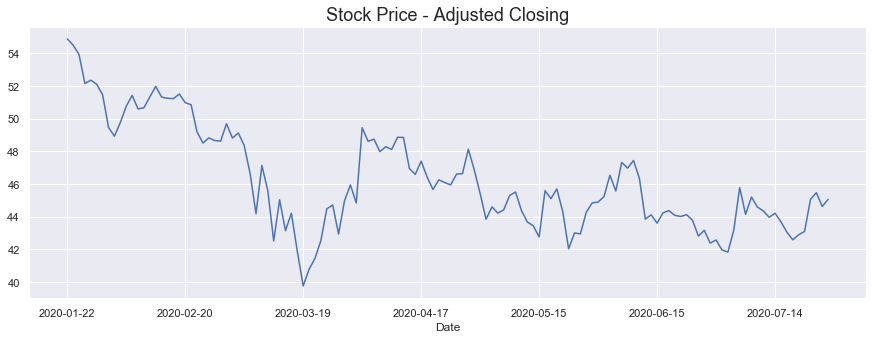

In [7]:
data.adjusted_close.plot(figsize = (15, 5))
plt.title("Stock Price - Adjusted Closing", fontsize = 18)
plt.show()

In [22]:
#Perform Augmented Dickey–Fuller test:
#Criteria : When test statistic is bigger than the 5% critical values, the data is not stationary.

# Stock Price
print('Results of Dickey Fuller Test - Stock Price:')
dftest = adfuller(data['adjusted_close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test - Stock Price:
Test Statistic                  -2.896575
p-value                          0.045748
#Lags Used                       1.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


# Decompose the Data

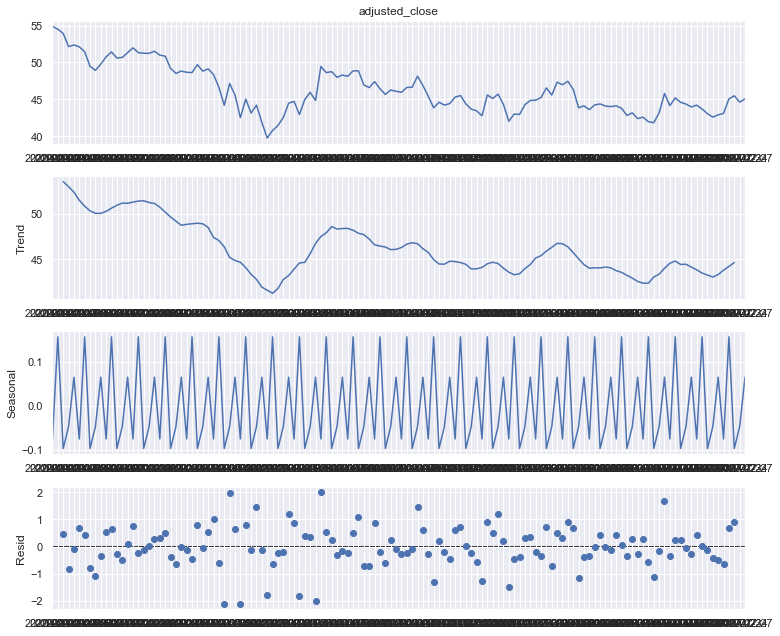

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

result = seasonal_decompose(data['adjusted_close'], model='additive', period= 5)
result.plot()
pyplot.show()

# Make data stationary

## Differencing 

yt‘ = yt – y(t-1)

In [10]:
# Transforming data by differencing

# Stock data
data['first_diff_adj_stock'] = data.adjusted_close.diff(periods = 1)
data = data.dropna()

In [11]:
data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-01-23,1,0,0,57.980000,57.020000,57.599998,57.770000,227900.0,54.500458,-0.386795
2020-01-24,2,0,0,57.799999,56.840000,57.730000,57.160000,146200.0,53.924980,-0.575478
2020-01-27,5,0,0,55.689999,54.820000,55.139999,55.279999,230600.0,52.151379,-1.773602
2020-01-28,5,0,0,56.090000,55.160000,55.490002,55.500000,174400.0,52.358929,0.207550
2020-01-29,5,0,0,55.900002,54.939999,55.799999,55.230000,214500.0,52.104210,-0.254719


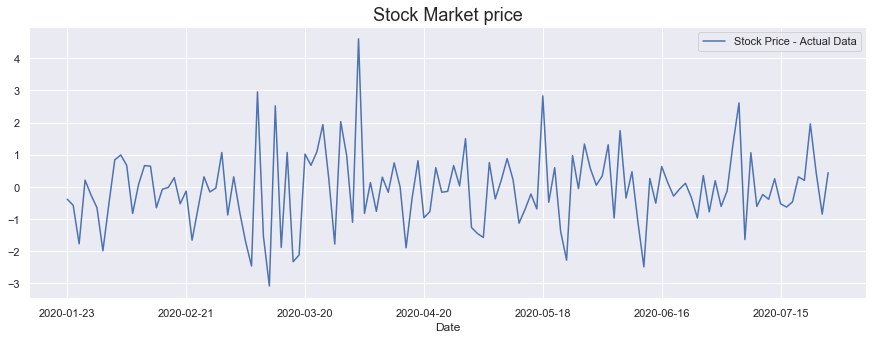

In [12]:
plt.figure(figsize = (15, 5))
data.first_diff_adj_stock.plot(label = "Stock Price - Actual Data")

#data.first_diff_adj_stock.rolling(5).mean().plot(label = "Rolling mean of stock Price")
#data.first_diff_adj_stock.rolling(5).std().plot(label = "Rolling std of stock Price")

plt.title("Stock Market price", fontsize = 18)
plt.legend()
plt.show()

In [13]:
data.isnull().sum()

confirmed               0
death                   0
recovered               0
High                    0
Low                     0
Open                    0
Close                   0
Volume                  0
adjusted_close          0
first_diff_adj_stock    0
dtype: int64

In [14]:
# Adfuller test after first differences
print('Results of Dickey Fuller Test - Stock Price after transformation:')
dftest = adfuller(data.first_diff_adj_stock, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

print('The test results:')
print('....................')
if dfoutput['Test Statistic'] > dfoutput['Critical Value (1%)']:
    print('Data is not Stationary after first difference')
else:
    print('Data is stationary after first difference')

Results of Dickey Fuller Test - Stock Price after transformation:
Test Statistic                -1.309835e+01
p-value                        1.730512e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64
The test results:
....................
Data is stationary after first difference


# Decompose data after the first difference

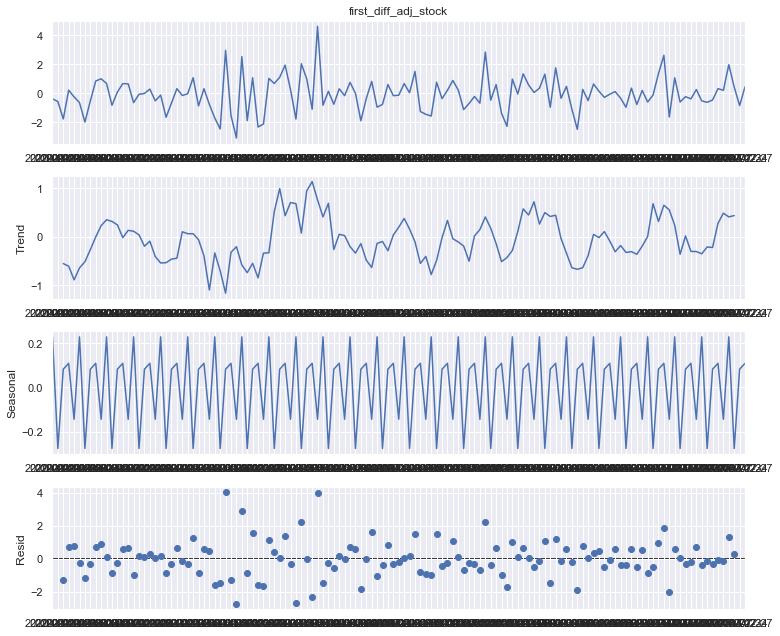

In [15]:
result = seasonal_decompose(data['first_diff_adj_stock'], model='additive', period= 5)
result.plot()
pyplot.show()

# Train and Test Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_data, test_data = train_test_split(data, train_size=0.80, shuffle=False)

In [18]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [19]:
train_data.tail()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-06-12,2048986,115334,547386,44.590000,43.430000,44.580002,44.110001,244300.0,44.110001,0.260002
2020-06-15,2114026,116773,576334,44.090000,43.049999,43.349998,43.599998,154800.0,43.599998,-0.510002
2020-06-16,2137731,117612,583503,45.029999,44.009998,44.549999,44.230000,113200.0,44.230000,0.630001
2020-06-17,2163290,118363,592191,44.630001,44.009998,44.320000,44.369999,145000.0,44.369999,0.139999
2020-06-18,2191099,119067,599115,44.380001,43.779999,44.380001,44.080002,142500.0,44.080002,-0.289997


In [20]:
test_data.head()

,confirmed,death,recovered,High,Low,Open,Close,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,,,,,,
2020-06-19,2222579,119739,606715,44.639999,43.820000,44.639999,44.009998,177900.0,44.009998,-0.070004
2020-06-22,2312303,121010,640198,44.270000,43.779999,43.900002,44.119999,118000.0,44.119999,0.110001
2020-06-23,2347491,121847,647548,44.169998,43.779999,44.020000,43.779999,207900.0,43.779999,-0.340000
2020-06-24,2382426,122604,656161,43.369999,42.540001,43.220001,42.810001,195200.0,42.810001,-0.969997
2020-06-25,2422299,125026,663562,43.169998,42.380001,42.720001,43.160000,117900.0,43.160000,0.349998


In [21]:
train_data.to_csv(r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\train_data.csv')
test_data.to_csv(r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\test_data.csv')